# Import The Packages Needed


---



In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
import random
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.inspection import permutation_importance

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Read And Examine the Files

*   check if the cells are empty
*   Check data types
*   Check Outliers in Numeric Data
*   Check Unique Values



In [3]:
#The training files are saved as zip files. I am decompressing the files first then reading them into dataframes. 

df = pd.read_csv('AB_NYC_2019.csv')
#inspect the training_features dataframe
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#checking if there are any null values in the dataframe
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
#Get the column names for our next step
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#take out the rows that are empty in these columns
df = df[df['name'].notna()]

df = df[df['host_name'].notna()]

In [7]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#describe the data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.373228,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.497816,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
#look for the sum of all the values that are empty in the dataframe
df.shape

(48858, 16)

In [10]:
#further investigate the data
#check the data types and total values in each column
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


*  Plot the distribution of salaries of those that have NONE Major since there are a lot of them.



C:\Users\oriar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


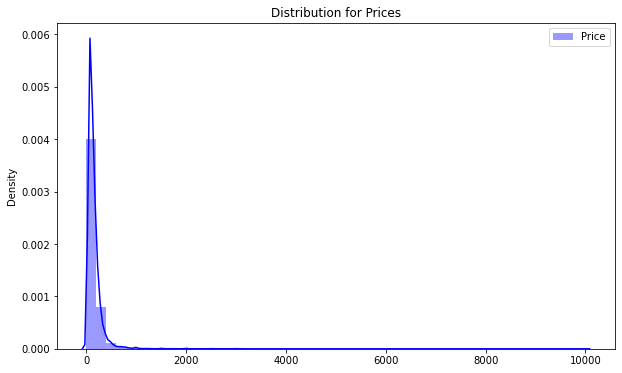

In [11]:
#Check the distribution of prices

plt.figure(figsize=(10,6))
plt.title("Distribution for Prices")
ax = sns.distplot(x = df['price'], color= 'b', label='Price')
plt.legend()
plt.show()


TypeError: '<' not supported between instances of 'str' and 'int'

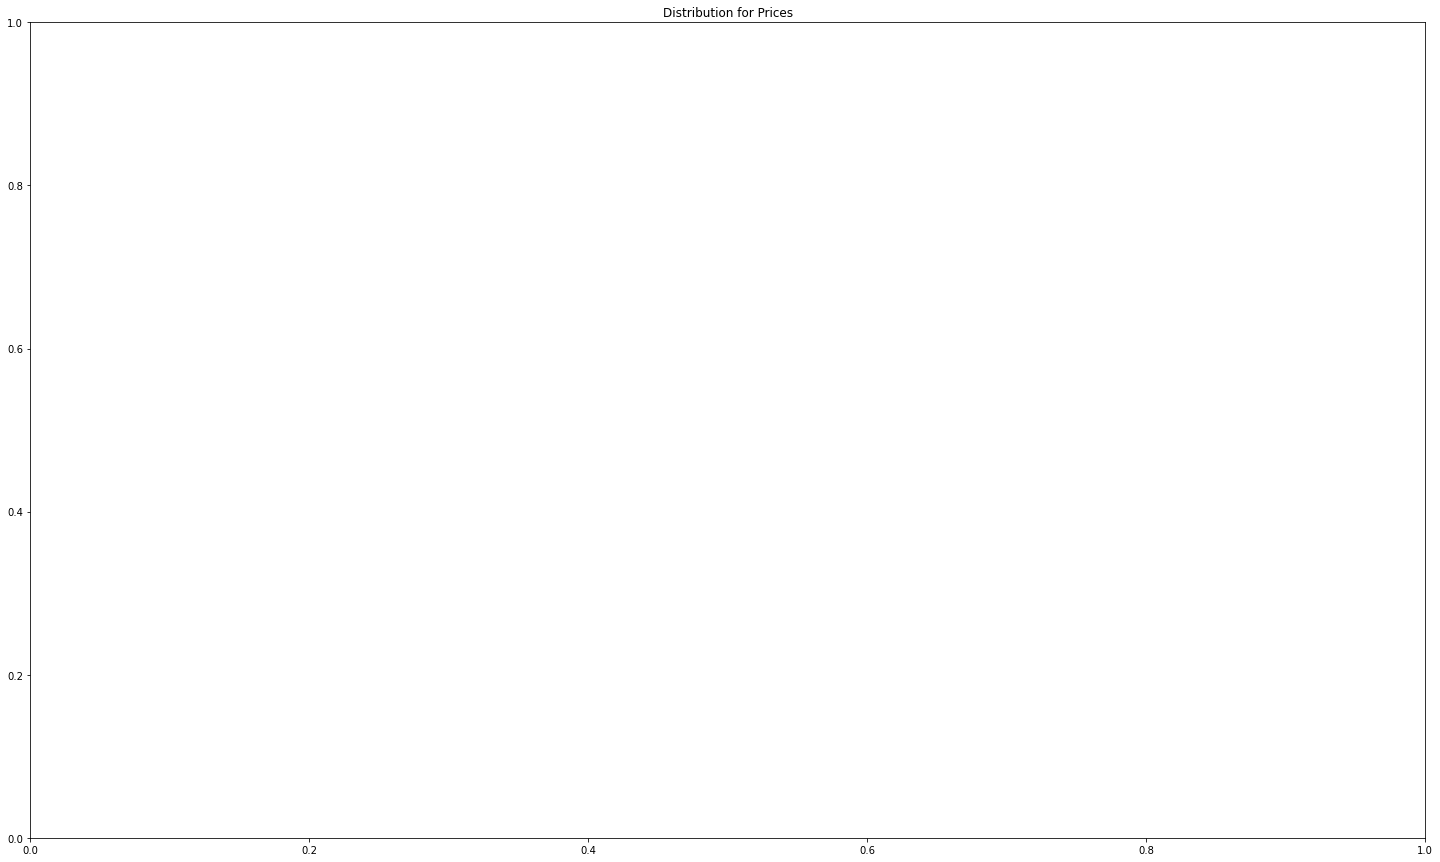

In [12]:
plt.figure(figsize=(25,15))
plt.title("Distribution for Prices")
ax = sns.countplot(x = df[df['neighbourhood']<10], color= 'b', label='Price')
plt.legend()
plt.xticks(rotation = 90)
plt.show()



C:\Users\oriar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


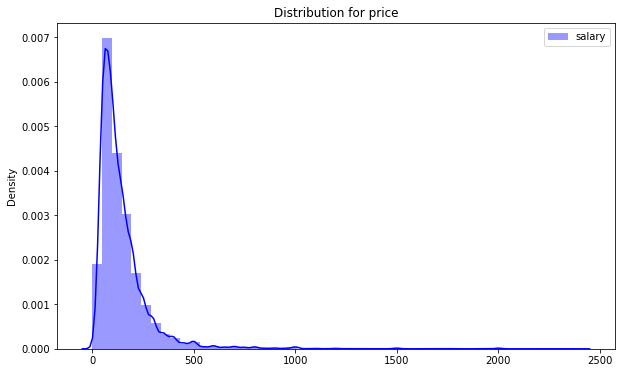

In [13]:
#Check the distribution of prices without outliers

def distplot(feature, frame):
    plt.figure(figsize=(10,6))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(x = frame[frame['price'] <2500][feature], color= 'b', label='salary')
    plt.legend()
    plt.show()
    
distplot('price', df)

In [14]:
#Next, we want to check the unique values of the categorical columns
#If some columns have strange values, we can take appropriate actions. 
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [15]:
#check the companyID unique values
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [16]:
#df.drop(df[df.availability_365 ==17].index)

# More Data Visualization


---
**All graphs are only a sample size of the total number of rows

*   Use for loop to visualize the categorical data
*   Plot The Boxplot of Years of Experience and salary
*   Plot the scatterplot of miles from metropolis and salary
*   Heatmap of all the features and salary








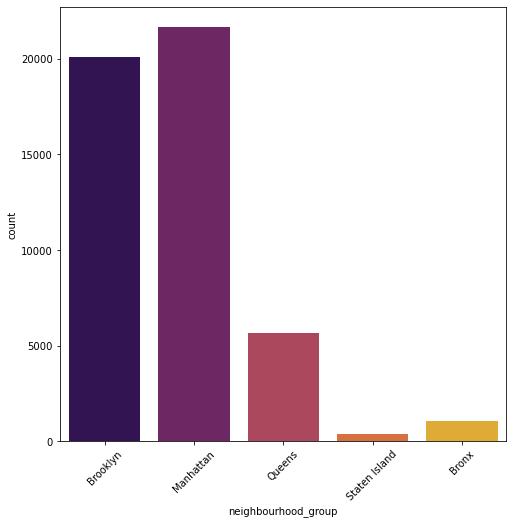

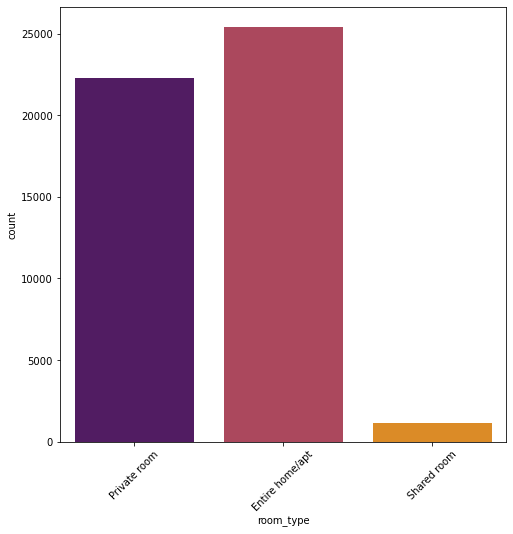

In [17]:
#save the column names into a variable
#Then I am using a for loop to plot the count of each category in these categorical columns
#Using for loop to save time and list the plots together.
#rotated the xticks to 45 degrees for readabiliity
#We can see that all values are pretty evenly distributed.
#In the major column, 'None' has the highest number. Will keep an eye on its effect on the training model later. 
cols = ['neighbourhood_group', 'room_type']
for column in df:
    if column in cols:
        plt.figure(figsize=(8,8))
        ax = sns.countplot(x = df[column], palette = 'inferno')
        plt.xticks(rotation = 45)
        plt.show()

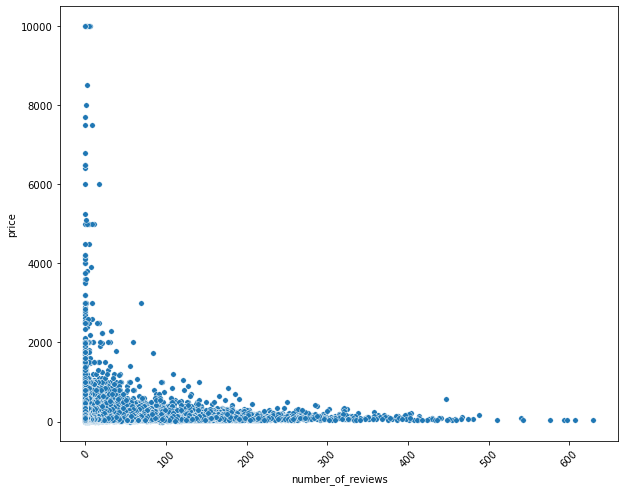

In [18]:
#Using the boxplot here to see the distribution of salary across different years
#We can notice a slight increase in salary as the years increase
#Only taking 2000 samples from the dataset for readability. 
#The samples are big enough to give us a visual representation of the whole dataset
plt.figure(figsize = (10,8))
sns.scatterplot(x=df['number_of_reviews'], y = df['price'], s = 30)
plt.xticks(rotation = 45)
plt.show()

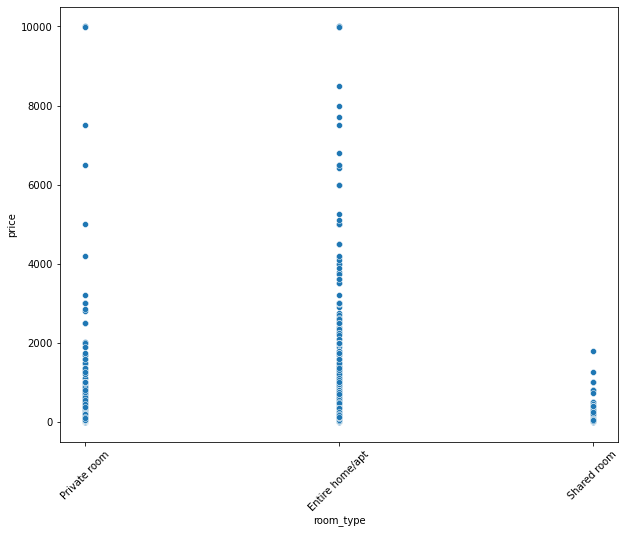

In [19]:
#check the scatterplot of the room types and prices
plt.figure(figsize = (10,8))
sns.scatterplot(x=df['room_type'], y=df['price'])
plt.xticks(rotation = 45)
plt.show()

In [20]:
#check the data types of the dataframe
#So that we know which values to convert to dummy indicators
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [295]:
#Get dummy variables of the categorical data
df_encoded = pd.get_dummies(df, columns = ['neighbourhood_group','room_type'])
df_encoded.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,low density,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,low density,40.75362,-73.98377,225,1,45,...,2,355,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,low density,40.80902,-73.94190,150,3,0,...,1,365,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,mid density,40.68514,-73.95976,89,1,270,...,1,194,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,low density,40.79851,-73.94399,80,10,9,...,1,0,0,0,1,0,0,1,0,0


In [296]:
df_encoded.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'neighbourhood_group_Bronx',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')

In [245]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,low density,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,low density,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,low density,40.80902,-73.94190,Private room,150,3,0,NaN,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,mid density,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,low density,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


,price,number_of_reviews,reviews_per_month,latitude,longitude,minimum_nights,availability_365,calculated_host_listings_count
price,1.000000,-0.031488,-0.011297,0.019518,0.041509,0.052845,0.048196,0.231978
number_of_reviews,-0.031488,1.000000,0.431674,-0.084396,-0.054200,-0.106086,0.156907,-0.105925
reviews_per_month,-0.011297,0.431674,1.000000,0.055559,0.091299,-0.173541,0.257156,-0.085297
latitude,0.019518,-0.084396,0.055559,1.000000,0.236368,-0.021405,0.074586,0.048057
longitude,0.041509,-0.054200,0.091299,0.236368,1.000000,-0.042827,0.095279,0.074138
minimum_nights,0.052845,-0.106086,-0.173541,-0.021405,-0.042827,1.000000,0.018556,0.169090
availability_365,0.048196,0.156907,0.257156,0.074586,0.095279,0.018556,1.000000,0.058840
calculated_host_listings_count,0.231978,-0.105925,-0.085297,0.048057,0.074138,0.169090,0.058840,1.000000


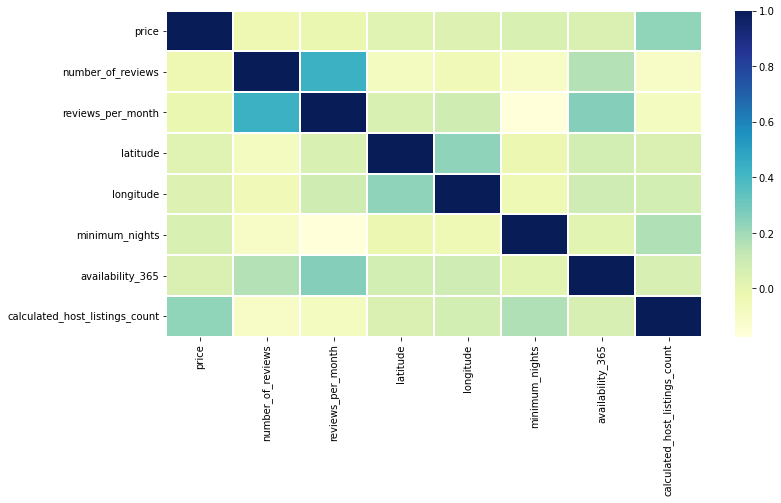

In [246]:
#plot the heatmap to check correlations amongst the variables
plt.figure(figsize=(12, 6))
corr = df[['price', 
           'number_of_reviews','reviews_per_month', 'latitude','longitude', 'minimum_nights',
           'availability_365','calculated_host_listings_count']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")


Running Linear Regression for all columns except neighbourhood (because latitude and longitude are more precise location identifiers) , reviews_per_month ( because it shares a strong correlation with number_of_reviews) and a dummy column for each categorical variable


In [312]:
from sklearn.preprocessing import OneHotEncoder
X = df_encoded.drop(['name','id' ,
                     'host_id','host_name','neighbourhood','neighbourhood_group_Bronx',
                     'last_review','reviews_per_month','price','room_type_Shared room'],axis = 1).copy()

In [313]:
X

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room
0,40.64749,-73.97237,1,9,6,365,1,0,0,0,0,1
1,40.75362,-73.98377,1,45,2,355,0,1,0,0,1,0
2,40.80902,-73.94190,3,0,1,365,0,1,0,0,0,1
3,40.68514,-73.95976,1,270,1,194,1,0,0,0,1,0
4,40.79851,-73.94399,10,9,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,2,9,1,0,0,0,0,1
48891,40.70184,-73.93317,4,0,2,36,1,0,0,0,0,1
48892,40.81475,-73.94867,10,0,1,27,0,1,0,0,1,0
48893,40.75751,-73.99112,1,0,6,2,0,1,0,0,0,0


In [314]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
#declare model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)



y_pred=model.predict(X_test)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_test,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_test,y_pred),2)))


RMSE: 223.64
R_squared: 0.1


In [316]:
# get importance
importance = model.coef_
# summarize feature importance
importance
model.coef_

array([-2.17094700e+02, -5.07241409e+02, -5.86423559e-02, -3.12034473e-01,
       -1.75109769e-01,  1.98682789e-01, -3.40604379e+01,  3.01136061e+01,
       -5.69037040e+00, -1.48724977e+02,  1.41783020e+02,  3.47910440e+01])

Running Linear Regression for only the important features :

In [317]:
X = X[['neighbourhood_group_Manhattan','availability_365','room_type_Entire home/apt','room_type_Private room']].copy()

In [318]:
X

,neighbourhood_group_Manhattan,availability_365,room_type_Entire home/apt,room_type_Private room
0,0,365,0,1
1,1,355,1,0
2,1,365,0,1
3,0,194,1,0
4,1,0,1,0
...,...,...,...,...
48890,0,9,0,1
48891,0,36,0,1
48892,1,27,1,0
48893,1,2,0,0


In [322]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
#declare model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)



y_pred=model.predict(X_test)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_test,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_test,y_pred),2)))


RMSE: 224.79
R_squared: 0.09


RMSE increased after taking only the important features

Reverting back to selecting all features and calculating training RMSE to check for model fit

In [324]:
X = df_encoded.drop(['name','id' ,
                     'host_id','host_name','neighbourhood','neighbourhood_group_Bronx',
                     'last_review','reviews_per_month','price','room_type_Shared room'],axis = 1).copy()

In [325]:
X

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room
0,40.64749,-73.97237,1,9,6,365,1,0,0,0,0,1
1,40.75362,-73.98377,1,45,2,355,0,1,0,0,1,0
2,40.80902,-73.94190,3,0,1,365,0,1,0,0,0,1
3,40.68514,-73.95976,1,270,1,194,1,0,0,0,1,0
4,40.79851,-73.94399,10,9,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,2,9,1,0,0,0,0,1
48891,40.70184,-73.93317,4,0,2,36,1,0,0,0,0,1
48892,40.81475,-73.94867,10,0,1,27,0,1,0,0,1,0
48893,40.75751,-73.99112,1,0,6,2,0,1,0,0,0,0


In [328]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
#declare model
model = LinearRegression()
# fit the model
model.fit(X_train, y_train)
#Calculating Training RMSE
y_pred=model.predict(X_train)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_train,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_train,y_pred),2)))


RMSE: 230.04
R_squared: 0.1


Training RMSE almost similar to Validation RMSE. Hence, model is not under-fitted or over-fitted

In [329]:
np.median(y)

106.0

Median price is half of that of RMSE. Hence, model is not accurate enough

Running k-neighbors algorithm to improve accuracy of prediction

In [330]:
#Scaling values in all predictor columns of data set
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)

In [331]:
X_train

array([[ 0.53198931, -0.9054702 , -0.31932549, ..., -0.0878633 ,
        -1.04101591, -0.91521741],
       [-0.7390706 ,  0.43950384, -0.21288262, ..., -0.0878633 ,
         0.96060011, -0.91521741],
       [-0.40716341, -0.31651451, -0.31932549, ..., -0.0878633 ,
        -1.04101591,  1.09263655],
       ...,
       [-0.60689355,  0.98218599, -0.31932549, ..., -0.0878633 ,
        -1.04101591,  1.09263655],
       [ 2.51922182,  1.32326323, -0.31932549, ..., -0.0878633 ,
        -1.04101591,  1.09263655],
       [-0.75481468,  0.7569012 , -0.21288262, ..., -0.0878633 ,
        -1.04101591,  1.09263655]])

Optimal value of k is generally square-root of sample size of training data set

In [332]:
X_train.shape

(34200, 12)

In [333]:
np.sqrt(34200)

184.9324200890693

Taking k=185 :

In [337]:
neigh = KNeighborsClassifier(n_neighbors = 185).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_test,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_test,y_pred,),2)))

RMSE: 227.47
R_squared: 0.06


Lower RMSE than Linear Regression

Running GrisSearch to find the optimal value of k in the range of 100 to 300

In [291]:
N=300
params = {'n_neighbors':range(100, N + 1 ,1)}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 108}

Using k=108 and applying it to the K neighbors algorithm :

In [338]:
neigh = KNeighborsClassifier(n_neighbors = 108).fit(X_train,y_train)
y_pred = neigh.predict(X_test)
print("RMSE: " + str(round(sqrt(mean_squared_error(y_test,y_pred)),2)))
print("R_squared: " + str(round(r2_score(y_test,y_pred,),2)))

RMSE: 227.65
R_squared: 0.06


It seems that the data needs to be looked at in more detail and checked for inconsistency or outliers which might be throwing off our prediction models